# Implementing Linear Regression with Categorical variable Using Sklearn

https://medium.com/analytics-vidhya/implementing-linear-regression-using-sklearn-76264a3c073c

## Imports

In [52]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Datasets

In [53]:
df=df = pd.read_excel('./Data/Multiple_variable.xlsx',sheet_name='Sheet2')
df.head()

,Age,YearsExperience,Salary,Gender,Classification,Job
0,22,1.1,39343,Female,Low,Assistant
1,22,1.3,46205,Male,TOP,Professor
2,23,1.5,37731,Female,TOP,Administrative
3,24,2.0,43525,Female,Medium,Assistant
4,25,2.2,39891,Male,Medium,Professor


## Data Pre-Processing

In [54]:
df.shape
df.describe()

,Age,YearsExperience,Salary
count,36.000000,36.000000,36.000000
mean,34.472222,6.008333,82228.277778
std,6.942565,3.031489,28784.838078
min,22.000000,1.100000,37731.000000
25%,29.000000,3.575000,57050.000000
50%,37.000000,5.600000,82225.500000
75%,40.250000,9.000000,110232.000000
max,49.000000,10.500000,122391.000000


In [55]:
df.dtypes

Age                  int64
YearsExperience    float64
Salary               int64
Gender              object
Classification      object
Job                 object
dtype: object

## Explanatory Data Analysis

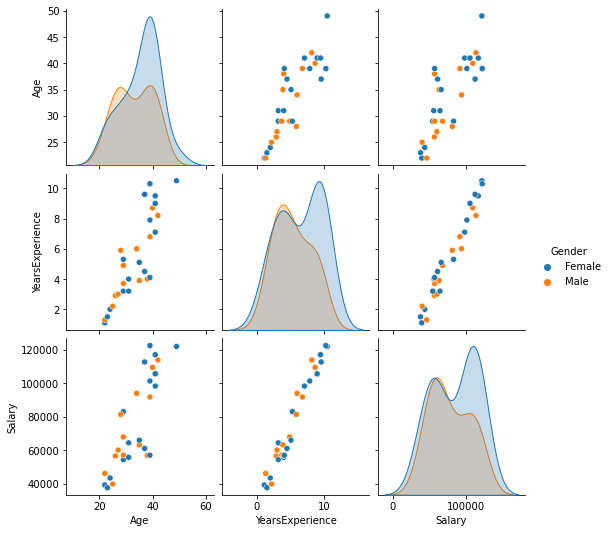

In [56]:
sns.pairplot(df, hue='Gender')

Years of Experience is directly proportional to Salary and even age.

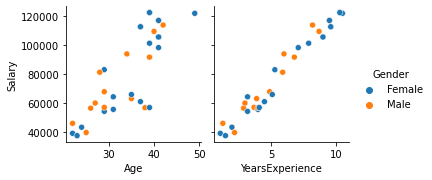

In [57]:
sns.pairplot(df,x_vars=['Age','YearsExperience'],y_vars=['Salary'],hue='Gender')

Age and Years of Experience both are correlated with Salary

In [58]:
df.corr()

,Age,YearsExperience,Salary
Age,1.000000,0.858866,0.825977
YearsExperience,0.858866,1.000000,0.982536
Salary,0.825977,0.982536,1.000000


<AxesSubplot:>

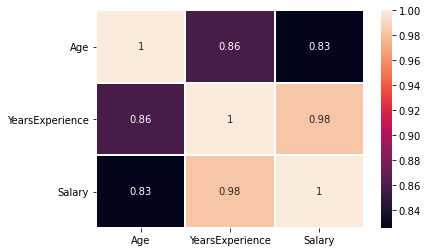

In [59]:
sns.heatmap(df.corr(),annot=True,lw=1)

<AxesSubplot:xlabel='Gender', ylabel='Age'>

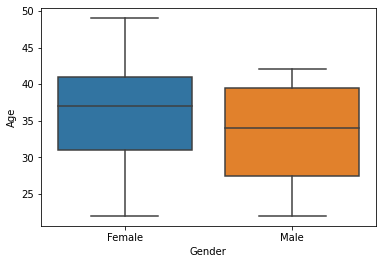

In [60]:
sns.boxplot(y='Age',x='Gender',data=df)

<AxesSubplot:xlabel='Classification', ylabel='Salary'>

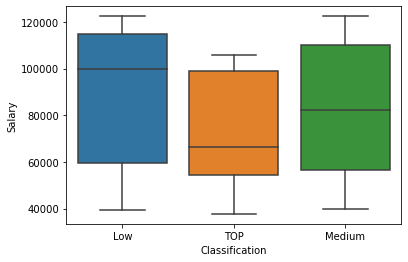

In [61]:
sns.boxplot(y='Salary',x='Classification',data=df)

## Dummy Variable
Regression results are easiest to interpret when dummy variables are limited to two specific values, 1 or 0. Typically, 1 represents the presence of a qualitative attribute, and 0 represents the absence.

In [62]:
X = df[['Age', 'YearsExperience', 'Gender', 'Classification', 'Job']]

In [63]:
X = pd.get_dummies(data=X, drop_first=True)
X.head()

,Age,YearsExperience,Gender_Male,Classification_Medium,Classification_TOP,Job_Assistant,Job_Manager,Job_Professor,Job_Senior Manager
0,22,1.1,0,0,0,1,0,0,0
1,22,1.3,1,0,1,0,0,1,0
2,23,1.5,0,0,1,0,0,0,0
3,24,2.0,0,1,0,1,0,0,0
4,25,2.2,1,1,0,0,0,1,0


In [64]:
Y = df['Salary']

## Create a train and test dataset

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21, 9)
(15, 9)
(21,)
(15,)


## SkLearn

In [66]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [67]:
# print the intercept
print(model.intercept_)

40767.075290708104


The sign of each coefficient indicates the direction of the relationship between a predictor variable and the response variable.

* A positive sign indicates that as the predictor variable increases, the Target variable also increases.
* A negative sign indicates that as the predictor variable increases, the Target variable decreases

In [68]:
coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_parameter

,Coefficient
Age,-548.323776
YearsExperience,10743.731522
Gender_Male,-655.537127
Classification_Medium,-6061.914786
Classification_TOP,-1234.672994
Job_Assistant,-1114.042048
Job_Manager,2291.025846
Job_Professor,964.080429
Job_Senior Manager,-2141.064227


In [69]:
predictions = model.predict(X_test)
predictions

array([ 80970.53158392,  54147.79230197,  84608.3284182 , 112838.31994826,
       111603.646954  , 121986.73865586, 111208.49523541, 125909.94403861,
       112148.27092338,  43036.55273237, 127901.81847906,  85930.91891418,
        71270.93953831,  62820.7589416 ,  41918.81087788])

<AxesSubplot:xlabel='Salary'>

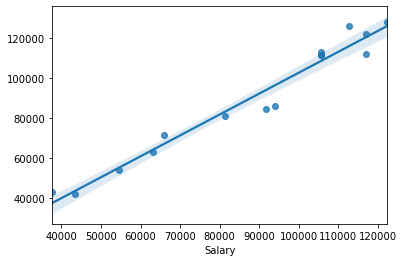

In [70]:
sns.regplot(y_test,predictions)

## StatsModels

In [71]:
import statsmodels.api as sm
X_train_Sm= sm.add_constant(X_train)
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     51.09
Date:                Sun, 09 Jul 2023   Prob (F-statistic):           4.20e-08
Time:                        22:21:20   Log-Likelihood:                -207.81
No. Observations:                  21   AIC:                             433.6
Df Residuals:                      12   BIC:                             443.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  3.261e+

### What Are the Adjusted R-squared?
We Use adjusted R-squared to compare the goodness-of-fit for regression models that contain different numbers of independent variables.